# Regresi√≥n Lineal M√∫ltiple Mejorada: Predicci√≥n de Emisiones de CO‚ÇÇ

## ‚úÖ 1. Objetivos

- Ampliar el modelo de regresi√≥n lineal m√∫ltiple anterior incorporando nuevas variables.
- Probar modelos no lineales como √Årboles de Decisi√≥n y Random Forest.
- Evaluar y tratar outliers para mejorar la precisi√≥n.
- Aplicar validaci√≥n cruzada para evaluar la generalizaci√≥n del modelo.


## ‚úÖ 2. Carga y exploraci√≥n de datos

### Cargar los datos

In [80]:
# Importar librerias
import pandas as pd
import numpy as np

In [81]:
file_path = '/content/drive/MyDrive/FuelConsumptionCo2.csv'
df = pd.read_csv(file_path)

In [82]:
# Mostrar las primeras 5 filas del dataframe con el m√©todo dataframe.head()
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

### Exploraci√≥n de datos

Usa df.describe() y df.info() para entender los datos.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [84]:
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

### Evaluaci√≥n de datos faltantes

In [85]:
missing_values = df.isnull().sum()
print(missing_values)

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


### Explorar distribuci√≥n y correlaci√≥n entre las variables `ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION_COMB` y `CO2EMISSIONS`

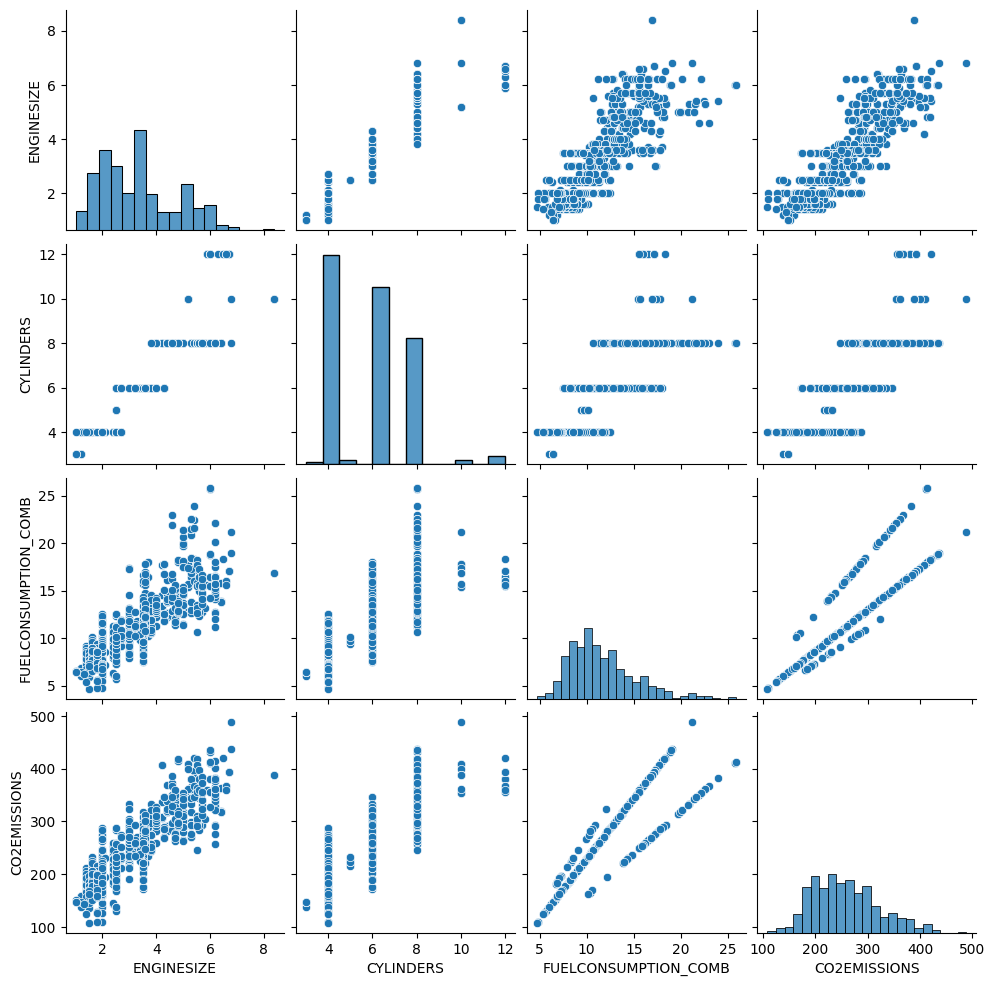

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']])
plt.show()

### Calcula la matriz de correlaci√≥n para elegir las variables m√°s relacionadas con `CO2EMISSIONS`.

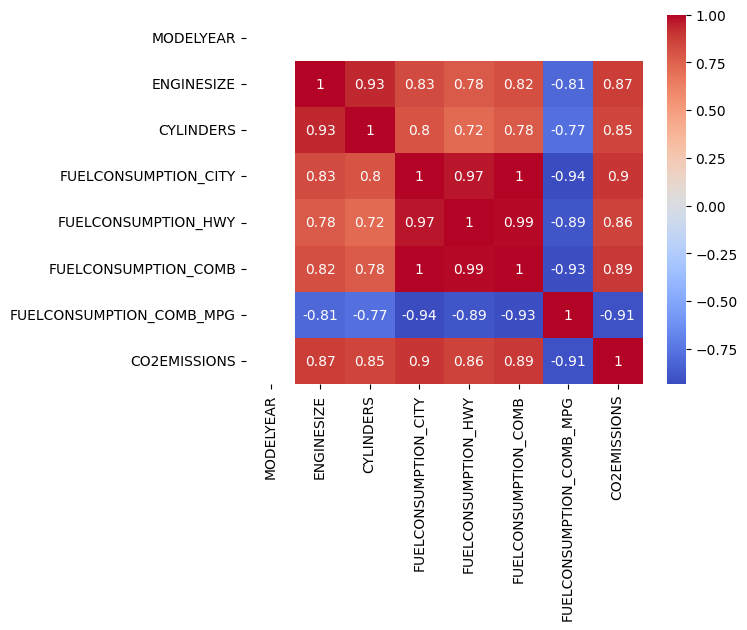

In [87]:
correlation = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## ‚úÖ 3. Limpieza y tratamiento de outliers


Se analizar√°n las distribuciones y se eliminar√°n o transformar√°n valores at√≠picos que puedan afectar el rendimiento del modelo.


### üìä An√°lisis de outliers mediante boxplots

En esta secci√≥n se gener√≥ una cuadr√≠cula de boxplots para todas las variables num√©ricas del dataset con el objetivo de identificar visualmente la presencia de valores at√≠picos (outliers).

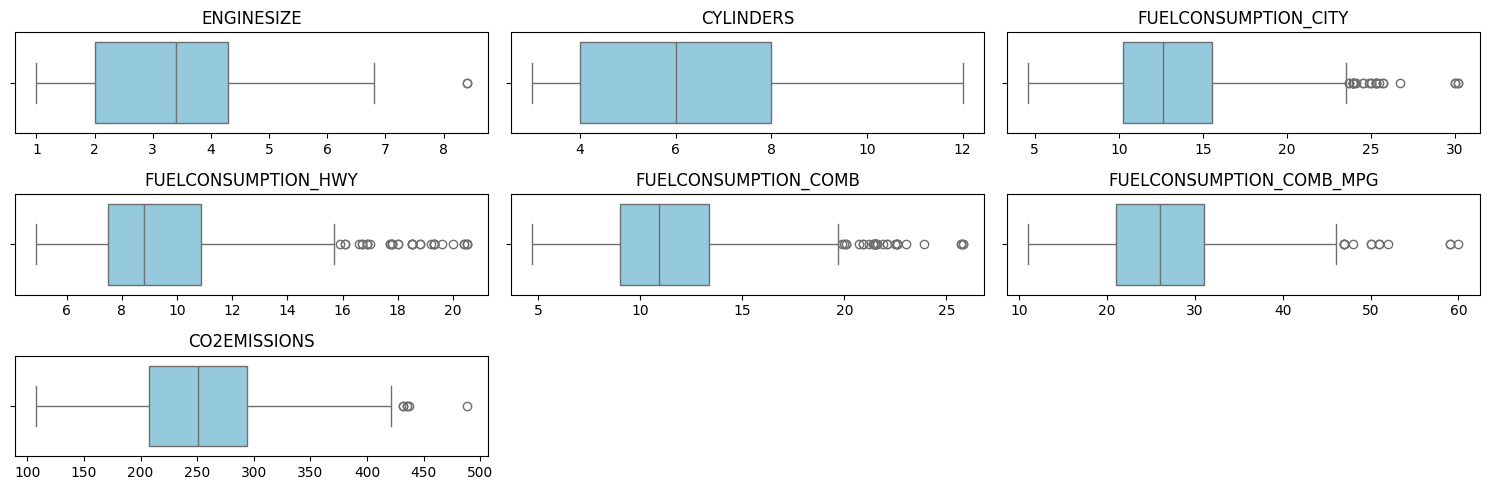

In [88]:
# Seleccionar las columnas num√©ricas para el gr√°fico
numerical_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

# Determina el n√∫mero de filas y columnas de la cuadr√≠cula para el dise√±o horizontal
n_rows = 3 # Puede ajustar el n√∫mero de filas seg√∫n sea necesario
n_cols = (len(numerical_cols) + n_rows - 1) // n_rows # Calcular el n√∫mero de columnas necesarias

# Crea una figura y una cuadr√≠cula de subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, 5)) # Ajustar el tama√±o de la figura para el dise√±o horizontal

# Aplana la matriz de ejes para facilitar iteraci√≥n
axes = axes.flatten()

# Crea un diagrama de caja para cada columna num√©rica en su subplot respectivo
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue') # Traza horizontalmente usando x
    axes[i].set_title(col) # Establece el t√≠tulo para cada subplot
    axes[i].set_xlabel('') # Elimina la etiqueta predeterminada del eje x

# Ocultar los subgr√°ficos no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajusta el dise√±o para evitar que las etiquetas se superpongan
plt.show()

üîç <strong>Observaciones clave</strong>:

`ENGINESIZE` y `CYLINDERS` presentan valores extremos en el rango superior, correspondientes a veh√≠culos con motores muy grandes o configuraciones poco comunes (*por ejemplo, 10 o 12 cilindros*).

Las variables de consumo de combustible (`FUELCONSUMPTION_CITY`, `HWY`, `COMB`) muestran una distribuci√≥n sesgada hacia la derecha, con algunos veh√≠culos que consumen significativamente m√°s combustible que el promedio.

`CO2EMISSIONS` tambi√©n presenta outliers en el extremo superior, lo cual es esperable en veh√≠culos de alto rendimiento o gran tama√±o.

Otras variables como `FUELCONSUMPTION_COMB_MPG` muestran outliers en el extremo inferior, lo que indica bajo rendimiento de combustible (*m√°s emisiones*).

‚úÖ <strong>Conclusi√≥n</strong>:

Este an√°lisis visual respalda la necesidad de aplicar una t√©cnica de limpieza como el m√©todo del rango intercuart√≠lico (IQR) para eliminar estos valores extremos antes de entrenar los modelos. Esto ayudar√° a mejorar la estabilidad y precisi√≥n de las predicciones.

### üìä An√°lisis de la Distribuci√≥n de Variables Num√©ricas

El an√°lisis visual de los histogramas nos permite entender la distribuci√≥n de las caracter√≠sticas principales del conjunto de datos.

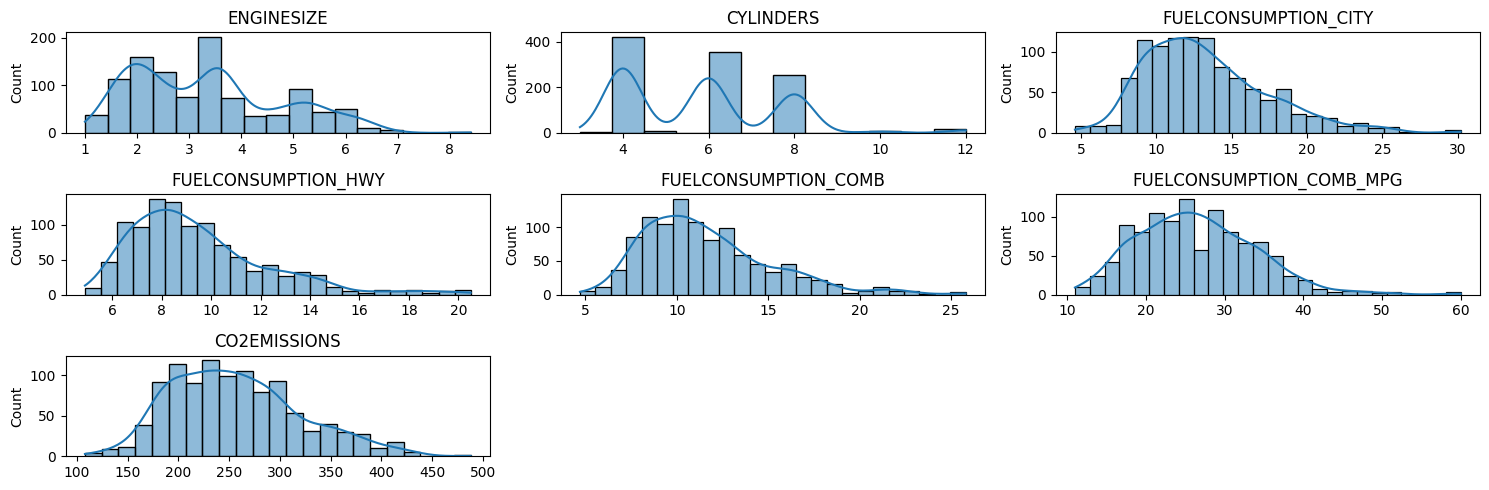

In [89]:
# Selecccionar las columnas num√©ricas
numerical_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

# Crear una cuadr√≠cula de histogramas
n_rows = 3
n_cols = (len(numerical_cols) + n_rows - 1) // n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, 5))
axes = axes.flatten()

# Trazar un histograma para cada columna num√©rica en su subplot respectivo
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Ocultar los subgr√°ficos no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<strong>Sesgo Predominante</strong> ‚û°Ô∏è:

La mayor√≠a de las variables continuas, como `ENGINESIZE`, `FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY`, `FUELCONSUMPTION_COMB` y `CO2EMISSIONS`, presentan un sesgo a la derecha (*sesgo positivo*). Esto indica que la mayor√≠a de los veh√≠culos en el dataset tienen motores de tama√±o moderado, con consumos y emisiones relativamente bajos. Los valores altos son menos frecuentes.

<strong>Excepciones Notables</strong> ‚ö†Ô∏è:

`FUELCONSUMPTION_COMB_MPG`: Esta variable muestra un sesgo a la izquierda (*sesgo negativo*) ‚¨ÖÔ∏è. Esto es coherente, ya que las millas por gal√≥n (MPG) son una medida inversa al consumo L/100km. Un alto rendimiento en MPG corresponde a un bajo consumo.

`CYLINDERS`: Al ser una variable discreta, su distribuci√≥n es multimodal, con picos claros en las categor√≠as m√°s comunes de 4, 6 y 8 cilindros.

<strong>Implicaciones</strong> üí°:

La presencia de sesgo en las variables es un factor importante a considerar para el preprocesamiento de datos. Para ciertos modelos de Machine Learning, podr√≠a ser beneficioso aplicar transformaciones (*ej. logar√≠tmica*) para normalizar estas distribuciones.

### Limpieza y tratamiento de outliers

En esta secci√≥n aplicamos el m√©todo del rango intercuart√≠lico (IQR) para detectar y eliminar valores at√≠picos en las variables num√©ricas del dataset. Esto ayuda a mejorar la precisi√≥n del modelo al reducir el impacto de valores extremos que podr√≠an sesgar los resultados.

In [90]:
# Seleccionar columnas num√©ricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Funci√≥n para eliminar outliers usando el m√©todo IQR
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Aplicar la funci√≥n al dataset
df_cleaned = remove_outliers_iqr(df, numeric_cols)

# Mostrar el n√∫mero de filas antes y despu√©s de la limpieza
print(f"N√∫mero de filas antes de eliminar outliers: {df.shape[0]}")
print(f"N√∫mero de filas despu√©s de eliminar outliers: {df_cleaned.shape[0]}")


N√∫mero de filas antes de eliminar outliers: 1067
N√∫mero de filas despu√©s de eliminar outliers: 998


*Se eliminaron 69 registros con valores at√≠picos.*


## ‚úÖ 4. Ingenier√≠a de variables


Se codificar√°n variables categ√≥ricas como `FUELTYPE`, `TRANSMISSION` y `VEHICLECLASS` usando One-Hot Encoding.

In [91]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['FUELTYPE', 'TRANSMISSION', 'VEHICLECLASS'], dtype=int)
display(df_cleaned.head())

MODELYEAR   MAKE    MODEL  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
0       2014  ACURA      ILX         2.0          4                   9.9   
1       2014  ACURA      ILX         2.4          4                  11.2   
3       2014  ACURA  MDX 4WD         3.5          6                  12.7   
4       2014  ACURA  RDX AWD         3.5          6                  12.1   
5       2014  ACURA      RLX         3.5          6                  11.9   

   FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
0                  6.7                   8.5                        33   
1                  7.7                   9.6                        29   
3                  9.1                  11.1                        25   
4                  8.7                  10.6                        27   
5                  7.7                  10.0                        28   

   CO2EMISSIONS  ...  VEHICLECLASS_PICKUP TRUCK - STANDARD  \
0           196  ...                                     0   
1           221  ...                                     0   
3           255  ...                                     0   
4           244  ...                                     0   
5           230  ...                                     0   

   VEHICLECLASS_SPECIAL PURPOSE VEHICLE  \
0                                     0   
1                                     0   
3                                     0   
4                                     0   
5                                     0   

   VEHICLECLASS_STATION WAGON - MID-SIZE  VEHICLECLASS_STATION WAGON - SMALL  \
0                                      0                                   0   
1                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   
5                                      0                                   0   

   VEHICLECLASS_SUBCOMPACT  VEHICLECLASS_SUV - SMALL  \
0                        0                         0   
1                        0                         0   
3                        0                         1   
4                        0                         1   
5                        0                         0   

   VEHICLECLASS_SUV - STANDARD  VEHICLECLASS_TWO-SEATER  \
0                            0                        0   
1                            0                        0   
3                            0                        0   
4                            0                        0   
5                            0                        0   

   VEHICLECLASS_VAN - CARGO  VEHICLECLASS_VAN - PASSENGER  
0                         0                             0  
1                         0                             0  
3                         0                             0  
4                         0                             0  
5                         0                             0  

[5 rows x 52 columns]

In [92]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1066
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MODELYEAR                              998 non-null    int64  
 1   MAKE                                   998 non-null    object 
 2   MODEL                                  998 non-null    object 
 3   ENGINESIZE                             998 non-null    float64
 4   CYLINDERS                              998 non-null    int64  
 5   FUELCONSUMPTION_CITY                   998 non-null    float64
 6   FUELCONSUMPTION_HWY                    998 non-null    float64
 7   FUELCONSUMPTION_COMB                   998 non-null    float64
 8   FUELCONSUMPTION_COMB_MPG               998 non-null    int64  
 9   CO2EMISSIONS                           998 non-null    int64  
 10  FUELTYPE_D                             998 non-null    int64  
 11  FUELTYPE_E

## ‚úÖ 5. Preprocesamiento y escalado

Selecciona tus features (X) y la variable objetivo (y).
Aplica StandardScaler para normalizar los datos pero ahora con m√°s features.

In [93]:
from sklearn.preprocessing import StandardScaler

features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
features = [col for col in features if col not in ['CO2EMISSIONS', 'MODELYEAR']]
target = 'CO2EMISSIONS'

X = df_cleaned[features]
y = df_cleaned[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## ‚úÖ 6. Divisi√≥n de datos

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## ‚úÖ 7. Entrenamiento de modelos

- Regresi√≥n Lineal M√∫ltiple (base)
- Regresi√≥n Polin√≥mica
- √Årbol de Decisi√≥n
- Random Forest

Regresi√≥n Lineal M√∫ltiple (base)

In [95]:
from sklearn.linear_model import LinearRegression

LRM = LinearRegression()
LRM.fit(X_train, y_train)

LinearRegression()

Regresi√≥n Polin√≥mica

In [96]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

PRM = LinearRegression()
PRM.fit(X_train_poly, y_train)

LinearRegression()

√Årbol de Decisi√≥n

In [97]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(random_state=42)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Random Forest

In [98]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=100, random_state=42)
RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## ‚úÖ 8. Evaluaci√≥n de modelos

Se utilizar√°n m√©tricas como R¬≤, MAE, MSE y RMSE. Tambi√©n se aplicar√° validaci√≥n cruzada para comparar el rendimiento.

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import cross_val_score

Regresi√≥n Lineal M√∫ltiple (base)

In [100]:
y_pred_LRM = LRM.predict(X_test)

print("R¬≤:", r2_score(y_test, y_pred_LRM))
print("MAE:", mean_absolute_error(y_test, y_pred_LRM))
print("MSE:", mean_squared_error(y_test, y_pred_LRM))
print("RMSE:", root_mean_squared_error(y_test, y_pred_LRM))

scores_LRM = cross_val_score(LRM, X_scaled, y, cv=5)
print("Validaci√≥n Cruzada (R¬≤):", scores_LRM.mean())

R¬≤: 0.9947186921459527
MAE: 1.8035473806961366
MSE: 19.326853140868096
RMSE: 4.396231697814401
Validaci√≥n Cruzada (R¬≤): 0.9942108209747442


Regresi√≥n Polin√≥mica

In [101]:
y_pred_PRM = PRM.predict(X_test_poly)

print("R¬≤:", r2_score(y_test, y_pred_PRM))
print("MAE:", mean_absolute_error(y_test, y_pred_PRM))
print("MSE:", mean_squared_error(y_test, y_pred_PRM))
print("RMSE:", root_mean_squared_error(y_test, y_pred_PRM))

scores_PRM = cross_val_score(PRM, X_scaled, y, cv=5)
print("Validaci√≥n Cruzada (R¬≤):", scores_PRM.mean())

R¬≤: 0.997452987127331
MAE: 0.9229639628514237
MSE: 9.320748780105633
RMSE: 3.0529901375709736
Validaci√≥n Cruzada (R¬≤): 0.9942108209747442


√Årbol de Decisi√≥n

In [102]:
y_pred_DTR = DTR.predict(X_test)

print("R¬≤:", r2_score(y_test, y_pred_DTR))
print("MAE:", mean_absolute_error(y_test, y_pred_DTR))
print("MSE:", mean_squared_error(y_test, y_pred_DTR))
print("RMSE:", root_mean_squared_error(y_test, y_pred_DTR))

scores_DTR = cross_val_score(DTR, X_scaled, y, cv=5)
print("Validaci√≥n Cruzada (R¬≤):", scores_DTR.mean())

R¬≤: 0.9992157360833325
MAE: 0.39
MSE: 2.87
RMSE: 1.6941074346097416
Validaci√≥n Cruzada (R¬≤): 0.980611278360529


Random Forest

In [103]:
y_pred_RFR = RFR.predict(X_test)

print("R¬≤:", r2_score(y_test, y_pred_RFR))
print("MAE:", mean_absolute_error(y_test, y_pred_RFR))
print("MSE:", mean_squared_error(y_test, y_pred_RFR))
print("RMSE:", root_mean_squared_error(y_test, y_pred_RFR))

scores_RFR = cross_val_score(RFR, X_scaled, y, cv=5)
print("Validaci√≥n Cruzada (R¬≤):", scores_RFR.mean())

R¬≤: 0.9978510157611361
MAE: 0.9259999999999993
MSE: 7.864170000000006
RMSE: 2.8043127500334206
Validaci√≥n Cruzada (R¬≤): 0.9857365180681814


## ‚úÖ 9. Comparaci√≥n de resultados

### Tabla para comparativo entre modelos.

In [104]:
def compare_models(models, X_train, y_train, X_test, y_test, X_train_poly, X_test_poly):
    results = []
    for name, model in models.items():
        # Train the model with the correct feature set
        if name == 'Regresi√≥n Polin√≥mica':
            model.fit(X_train_poly, y_train)
        else:
            model.fit(X_train, y_train)

        # Make predictions based on the model type and test features
        if name == 'Regresi√≥n Polin√≥mica':
            y_pred = model.predict(X_test_poly)
        else:
            y_pred = model.predict(X_test)

        # Calculate test set metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        cross_val_r2 = cross_val_score(model, X_scaled, y, cv=5).mean()

        # Append results
        results.append([name, r2, mae, mse, rmse, cross_val_r2])

    results_df = pd.DataFrame(results, columns=['Modelo', 'R¬≤', 'MAE', 'MSE', 'RMSE', 'Cross-Validation R¬≤'])
    return results_df

models = {
    'Regresi√≥n Lineal M√∫ltiple (base)': LRM,
    'Regresi√≥n Polin√≥mica': PRM,
    '√Årboles de Decisi√≥n': DTR,
    'Random Forest': RFR
}
# Call the function with all necessary training and test data
results_df = compare_models(models, X_train, y_train, X_test, y_test, X_train_poly, X_test_poly)
display(results_df)

Modelo        R¬≤       MAE        MSE      RMSE  \
0  Regresi√≥n Lineal M√∫ltiple (base)  0.994719  1.803547  19.326853  4.396232   
1              Regresi√≥n Polin√≥mica  0.997453  0.922964   9.320749  3.052990   
2               √Årboles de Decisi√≥n  0.999216  0.390000   2.870000  1.694107   
3                     Random Forest  0.997851  0.926000   7.864170  2.804313   

   Cross-Validation R¬≤  
0             0.994211  
1             0.994211  
2             0.980611  
3             0.985737

### üìä Gr√°fico de Barras Agrupadas


Este gr√°fico muestra claramente c√≥mo se comporta cada modelo en cada m√©trica:

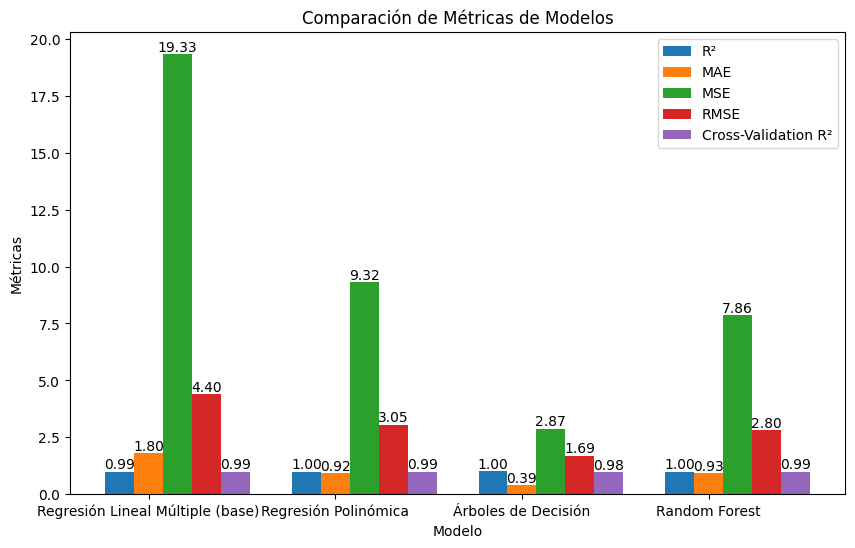

In [105]:
# Gr√°fico de Barras Agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(results_df))
width = 0.155

for i, metric in enumerate(['R¬≤', 'MAE', 'MSE', 'RMSE', 'Cross-Validation R¬≤']):
    ax.bar(x + i * width, results_df[metric], width, label=metric)

    # Agregar valores en las barras
    for j, value in enumerate(results_df[metric]):
        ax.text(x[j] + i * width, value, f'{value:.2f}', ha='center', va='bottom')

ax.set_xlabel('Modelo')
ax.set_ylabel('M√©tricas')
ax.set_title('Comparaci√≥n de M√©tricas de Modelos')
ax.set_xticks(x + width)
ax.set_xticklabels(results_df['Modelo'])
ax.legend()

plt.show()

### üï∏Ô∏è Gr√°fico de Radar (Spider Chart)

Este gr√°fico permite ver de forma intuitiva qu√© tan equilibrado es el rendimiento de cada modelo en todas las m√©tricas (normalizadas):

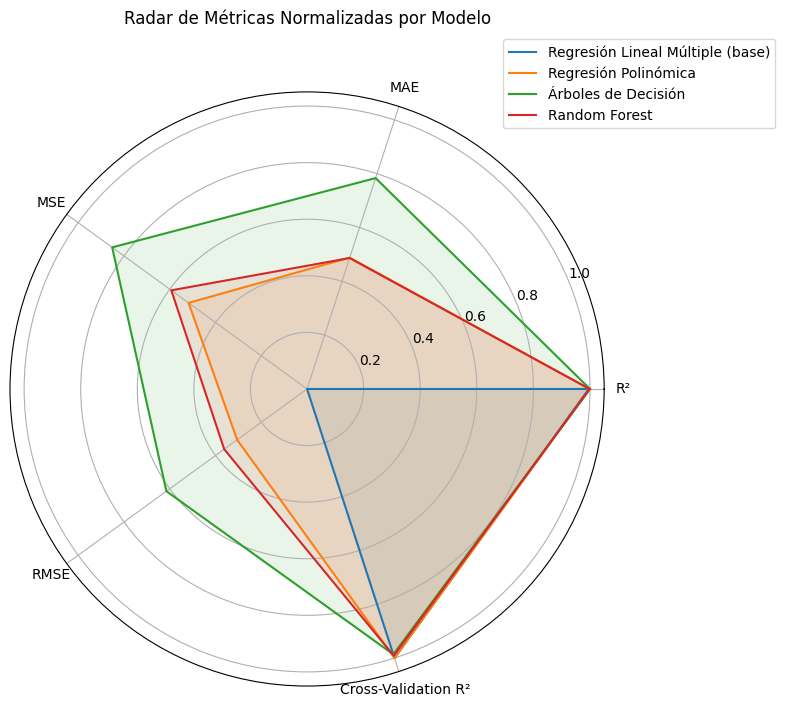

In [106]:
from math import pi

# Copiar el DataFrame original
df_radar = results_df.copy()

# Normalizar e invertir las m√©tricas de error (para que 1 sea mejor)
df_radar['MAE'] = 1 - df_radar['MAE'] / df_radar['MAE'].max()
df_radar['MSE'] = 1 - df_radar['MSE'] / df_radar['MSE'].max()
df_radar['RMSE'] = 1 - df_radar['RMSE'] / df_radar['RMSE'].max()

# Normalizar R¬≤
df_radar['R¬≤'] = df_radar['R¬≤'] / df_radar['R¬≤'].max()

# Normalizar Validaci√≥n Cruzada R¬≤:
df_radar['Cross-Validation R¬≤'] = df_radar['Cross-Validation R¬≤'] / df_radar['Cross-Validation R¬≤'].max()

# Seleccionar las m√©tricas a graficar (en orden de preferencia visual)
metricas = ['R¬≤', 'MAE', 'MSE', 'RMSE', 'Cross-Validation R¬≤']

# Etiquetas y √°ngulos
labels = metricas
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Cerrar el c√≠rculo

# Crear gr√°fico
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

# Graficar cada modelo
for i, row in df_radar.iterrows():
    valores = row[metricas].tolist()
    valores += valores[:1]  # Cerrar el c√≠rculo
    ax.plot(angles, valores, label=row['Modelo'])
    ax.fill(angles, valores, alpha=0.1)

# Configurar etiquetas y t√≠tulo
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Radar de M√©tricas Normalizadas por Modelo', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

### üß† <strong>Observaciones</strong>:

<br>**√Årbol de Decisi√≥n destaca** con el mejor R¬≤ y los errores m√°s bajos en el conjunto de prueba, pero su validaci√≥n cruzada es la m√°s baja, lo que sugiere posible sobreajuste ‚ö†Ô∏è.
</br>
<br>
**Random Forest ofrece** un excelente equilibrio entre precisi√≥n y generalizaci√≥n, siendo una opci√≥n muy robusta üí™.</br>
<br>
**Regresi√≥n Polin√≥mica** mejora significativamente respecto a la lineal, especialmente en MAE y MSE, sin perder capacidad de generalizaci√≥n üéØ.</br>
<br>
**Regresi√≥n Lineal M√∫ltiple**, aunque es la m√°s simple, muestra un rendimiento s√≥lido, pero claramente superado por los modelos m√°s complejos üìâ.</br>

## ‚úÖ 10. Conclusiones y recomendaciones

### ‚úÖ Conclusiones

Tras ampliar el preprocesamiento y enriquecer el conjunto de caracter√≠sticas, se evaluaron m√∫ltiples modelos de regresi√≥n. A continuaci√≥n, se resumen las principales conclusiones:

üîç Comparaci√≥n de Modelos

<br>**Regresi√≥n Lineal M√∫ltiple**: Aunque fue el modelo base, su rendimiento fue superado por modelos m√°s complejos. Sin embargo, sigue siendo √∫til como referencia por su simplicidad y rapidez de entrenamiento.</br>

<br>**Regresi√≥n Polin√≥mica**: Mostr√≥ una mejora significativa en precisi√≥n respecto al modelo lineal, especialmente en MAE y MSE. Es una buena opci√≥n cuando se sospecha de relaciones no lineales entre las variables.</br>

<br>**√Årbol de Decisi√≥n**: Obtuvo el mejor desempe√±o en el conjunto de prueba, pero su baja puntuaci√≥n en validaci√≥n cruzada sugiere un posible sobreajuste. Ideal para exploraci√≥n inicial o cuando se requiere interpretabilidad.</br>

<br>**Random Forest**: Ofreci√≥ el mejor equilibrio entre precisi√≥n y capacidad de generalizaci√≥n. Es el modelo m√°s robusto y confiable en este an√°lisis, recomendado para producci√≥n o toma de decisiones.</br>

üìå Recomendaciones

<br>Para aplicaciones donde la precisi√≥n es cr√≠tica, se recomienda utilizar **Random Forest**.</br>

<br>Si se busca un modelo explicable y r√°pido, la **Regresi√≥n Lineal M√∫ltiple** sigue siendo v√°lida.</br>

<br>Se sugiere realizar una b√∫squeda de hiperpar√°metros (**GridSearchCV** o **RandomizedSearchCV**) para afinar a√∫n m√°s los modelos m√°s complejos.</br>

<br>Considerar t√©cnicas de reducci√≥n de dimensionalidad o selecci√≥n de caracter√≠sticas si el n√∫mero de variables sigue creciendo.</br>